# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import json
import requests
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_key import weather_api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/city_data.csv"

# Range of latitude and longitude
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [24]:
# Base URL and add units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Create the lists we will need to append to for the dataframe
cities = []
lat = []
long = []
maxtemp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Initialise counters
set_count = 1
record_count = 1


print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through the city names and make the query url for each city - enumerate makes each item in city_names numerical, which is needed to get request the OpenWeatherAPI
for i, city in enumerate(city_names):
    
    # Use modulo to ensure that the records are printed in groups of 50's
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Make the query url
    query_url = url + "units=" + units + "&appid=" + weather_api_key + "&q=" + city
         
    # Get request the json
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Increase record count for next loop
    record_count += 1
    
   # Append the necessary items to a list and add an exception for when a city can't be found
    try:       
        cities.append(response["name"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
    except:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | te anau
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | perpignan
Processing Record 8 of Set 1 | kiama
Processing Record 9 of Set 1 | north bend
Processing Record 10 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 11 of Set 1 | amderma
City not found. Skipping...
Processing Record 12 of Set 1 | airai
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | dujuma
City not found. Skipping...
Processing Record 15 of Set 1 | dingle
Processing Record 16 of Set 1 | zhaotong
Processing Record 17 of Set 1 | safwah
City not found. Skipping...
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | jati
Processing Record 20 of Set

Processing Record 36 of Set 4 | pietersburg
Processing Record 37 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 38 of Set 4 | ambon
Processing Record 39 of Set 4 | ixtapa
Processing Record 40 of Set 4 | lavrentiya
Processing Record 41 of Set 4 | tara
Processing Record 42 of Set 4 | pasighat
Processing Record 43 of Set 4 | anaconda
Processing Record 44 of Set 4 | ghanzi
Processing Record 45 of Set 4 | takoradi
Processing Record 46 of Set 4 | lorengau
Processing Record 47 of Set 4 | jurm
Processing Record 48 of Set 4 | namibe
Processing Record 49 of Set 4 | hambantota
Processing Record 50 of Set 4 | muravlenko
Processing Record 1 of Set 5 | vernon
Processing Record 2 of Set 5 | viedma
Processing Record 3 of Set 5 | chitral
Processing Record 4 of Set 5 | alotau
City not found. Skipping...
Processing Record 5 of Set 5 | koslan
Processing Record 6 of Set 5 | vung tau
Processing Record 7 of Set 5 | shubarkuduk
Processing Record 8 of Set 5 | berlevag
Processing Record 9 of 

Processing Record 24 of Set 8 | araripina
Processing Record 25 of Set 8 | port moresby
Processing Record 26 of Set 8 | skibbereen
Processing Record 27 of Set 8 | sofiysk
City not found. Skipping...
Processing Record 28 of Set 8 | marsh harbour
Processing Record 29 of Set 8 | taoudenni
Processing Record 30 of Set 8 | aripuana
Processing Record 31 of Set 8 | erzurum
Processing Record 32 of Set 8 | moshenskoye
Processing Record 33 of Set 8 | dianopolis
City not found. Skipping...
Processing Record 34 of Set 8 | aloleng
Processing Record 35 of Set 8 | einsiedeln
Processing Record 36 of Set 8 | morondava
Processing Record 37 of Set 8 | kruisfontein
Processing Record 38 of Set 8 | norman wells
Processing Record 39 of Set 8 | galveston
Processing Record 40 of Set 8 | aksarka
Processing Record 41 of Set 8 | matay
Processing Record 42 of Set 8 | ternate
Processing Record 43 of Set 8 | eskasem
City not found. Skipping...
Processing Record 44 of Set 8 | namtsy
Processing Record 45 of Set 8 | coll

Processing Record 12 of Set 12 | lakatoro
Processing Record 13 of Set 12 | baykit
Processing Record 14 of Set 12 | buena vista
Processing Record 15 of Set 12 | banfora
Processing Record 16 of Set 12 | coruripe
Processing Record 17 of Set 12 | maxixe
Processing Record 18 of Set 12 | bako
Processing Record 19 of Set 12 | fukue
Processing Record 20 of Set 12 | carutapera
Processing Record 21 of Set 12 | atar
Processing Record 22 of Set 12 | lahaina
Processing Record 23 of Set 12 | iberia
Processing Record 24 of Set 12 | esso
Processing Record 25 of Set 12 | cairns
Processing Record 26 of Set 12 | nemuro
Processing Record 27 of Set 12 | imbituba
Processing Record 28 of Set 12 | shilovo
Processing Record 29 of Set 12 | senmonorom
City not found. Skipping...
Processing Record 30 of Set 12 | dong hoi
Processing Record 31 of Set 12 | inhambane
Processing Record 32 of Set 12 | bucerias
Processing Record 33 of Set 12 | tezu
Processing Record 34 of Set 12 | dubbo
Processing Record 35 of Set 12 | 

Processing Record 47 of Set 15 | catamarca
Processing Record 48 of Set 15 | takhtamygda
Processing Record 49 of Set 15 | vilhena
Processing Record 50 of Set 15 | poitiers
Processing Record 1 of Set 16 | emerald
Processing Record 2 of Set 16 | mogoytuy
Processing Record 3 of Set 16 | meulaboh
Processing Record 4 of Set 16 | alyangula
Processing Record 5 of Set 16 | lokosovo
Processing Record 6 of Set 16 | boyabat
Processing Record 7 of Set 16 | austin
Processing Record 8 of Set 16 | beloha
Processing Record 9 of Set 16 | port augusta
Processing Record 10 of Set 16 | zabid
Processing Record 11 of Set 16 | san rafael
Processing Record 12 of Set 16 | honiara
Processing Record 13 of Set 16 | abdulino
Processing Record 14 of Set 16 | dombarovskiy
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Put the data into a dataframe
city_data_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "Lng": long,
    "Max Temp": maxtemp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})

# Display the DataFrame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Te Anau,-45.4167,167.7167,39.96,91,25,2.10,NZ,1620913391
1,San Patricio,28.0170,-97.5169,69.15,76,13,13.71,US,1620913392
2,Lompoc,34.6391,-120.4579,58.14,85,90,3.44,US,1620913268
3,Atuona,-9.8000,-139.0333,79.47,80,16,20.07,PF,1620913392
4,Hilo,19.7297,-155.0900,70.29,93,46,3.09,US,1620913392


In [5]:
# How many entries were returned?
city_data_df.count()

City          697
Lat           697
Lng           697
Max Temp      697
Humidity      697
Cloudiness    697
Wind Speed    697
Country       697
Date          697
dtype: int64

In [25]:
# Inspect the data by using the describe function
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,6.970000e+02
mean,19.384611,23.109295,68.018393,65.378766,52.007174,7.949010,1.620913e+09
std,32.938324,88.708886,19.318758,23.055655,40.573209,5.447714,7.217102e+01
min,-54.800000,-179.166700,-0.630000,4.000000,0.000000,0.000000,1.620913e+09
25%,-8.613600,-58.431800,56.710000,51.000000,8.000000,3.910000,1.620913e+09
50%,22.239400,27.911600,71.670000,70.000000,51.000000,6.910000,1.620913e+09
75%,47.616700,101.283300,80.940000,83.000000,98.000000,10.740000,1.620914e+09
max,78.218600,179.316700,132.370000,100.000000,100.000000,33.460000,1.620914e+09


In [26]:
# Export the city data into a csv file
city_data_df.to_csv("../output_data/city_data.csv", index=False)

In [27]:
# Show Record Count
countforme = len(city_data_df)
countforme

697

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [18]:
# Calculate latest date (max) for plot titles
tstamp = city_data_df.Date.max()

# Convert Unix timestamp to formated date
fdate= time.strftime("%m/%d/%y",time.localtime(tstamp))
fdate

'05/13/21'

#### Latitude vs. Temperature Plot

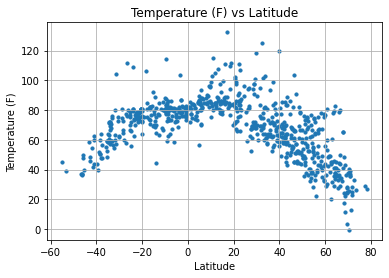

In [31]:
# Plot Temperature in Farenheit vs Latitude
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", s = 10)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature (F) vs Latitude")

# As latitude approaches 0, i.e. the equator, temperature increases

plt.savefig("../output_data/tempvlat.png")

In [21]:
# The above figure plots City Latitude vs Maximum Temperature. It shows us that on the 29/09, when the city is closer to the equator (closer to a latitude of 0), the maximum temperature is generally higher.

#### Latitude vs. Humidity Plot

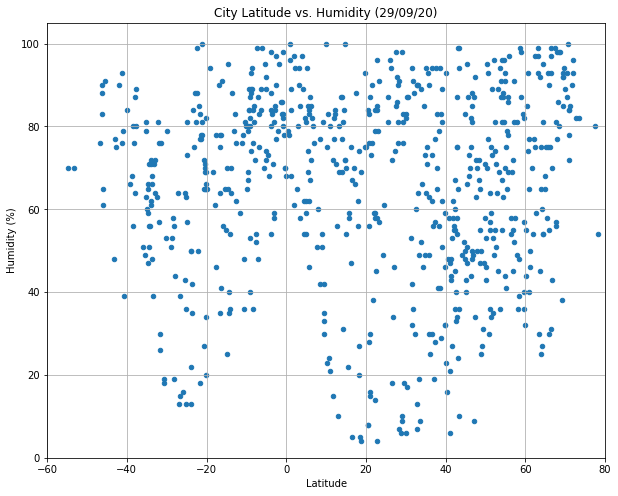

In [11]:
# Plot Humidity in percent vs Latitude
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", s = 10)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs Latitude")

# There seems to be no relationship between humidity and latitude

plt.savefig("../../output_data/humlat.png")

#### Latitude vs. Cloudiness Plot

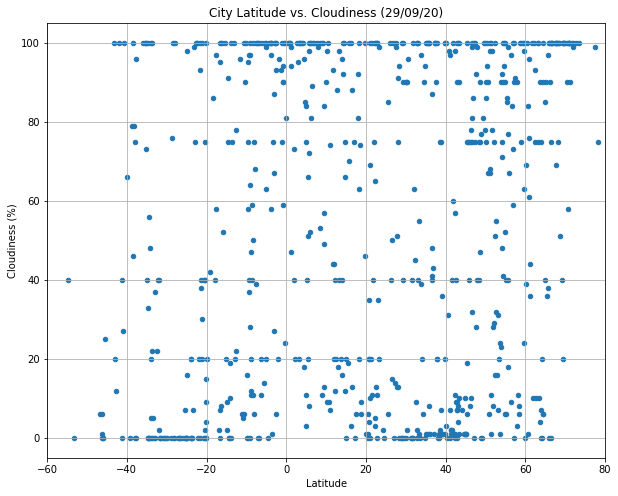

In [12]:
%matplotlib inline
city_data_df.plot.scatter(x="Lat", y="Cloudiness", xlim=(-60, 80), ylim=(-5,105), grid=True, title="City Latitude vs. Cloudiness (29/09/20)", figsize=(10,8))

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/LatvsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

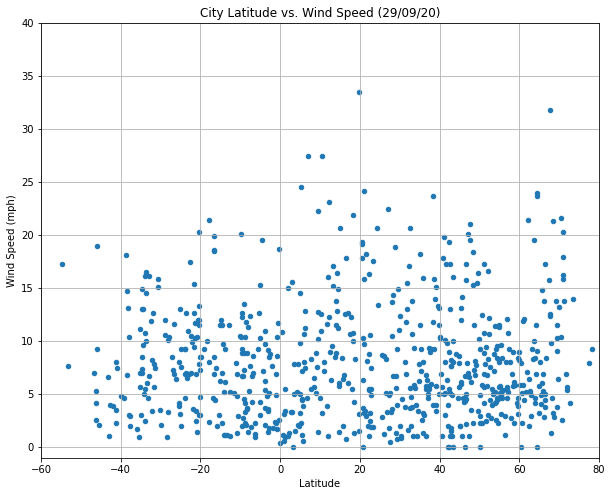

In [13]:
%matplotlib inline
city_data_df.plot.scatter(x="Lat", y="Wind Speed", xlim=(-60, 80), ylim=(-1,40), grid=True, title="City Latitude vs. Wind Speed (29/09/20)", figsize=(10,8))

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/LatvsWindSpeed.png")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northlat_df = weather_data.loc[weather_data["Latitude"] >= 0,:]
southlat_df = weather_data.loc[weather_data["Latitude"] < 0,:]

northlat_df.head()

NameError: name 'weather_data' is not defined

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")
model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
model

In [ ]:
#capavg['Weight (g)']
mslope = 0.9544396890241045
bintercept = 21.552160532685015


y_values = capavg['Weight (g)']*mslope+bintercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('scatplotlatitudewindspeed')
plt.show()


In [ ]:
#Your next objective is to run linear regression on each relationship, only this time separating 
#them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and 
#Southern Hemisphere (less than 0 degrees latitude):

#Northern Hemisphere - Temperature (F) vs. Latitude
#Southern Hemisphere - Temperature (F) vs. Latitude
#Northern Hemisphere - Humidity (%) vs. Latitude
#Southern Hemisphere - Humidity (%) vs. Latitude
#Northern Hemisphere - Cloudiness (%) vs. Latitude
#Southern Hemisphere - Cloudiness (%) vs. Latitude
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
#Southern Hemisphere - Wind Speed (mph) vs. Latitude

#After each pair of plots explain what the linear regression is analyzing, any relationships you notice and any other analysis you may have.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('northerntemplat')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('southerntemplat')

print("The high r value indicates a strong positive correlation between latitude and max temperature.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('northernhumlat')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('southernhumlat')

print("The low r values indicate a weak to no relationship between humidity and latitude.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('northerncloudlat')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('southerncloudlat')

print("The low r values indicate a weak positive relationship between latitude and cloudiness.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('northernwindlat')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('southernwindlat')

print("The low r values indicate that there is no real relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.")
      